<a href="https://colab.research.google.com/github/YADWHO/Diabetes_prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependancies

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data collection,analysis and preprocessing

In [25]:
diabetes=pd.read_csv('/content/diabetes.csv')

In [26]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
diabetes.shape

(768, 9)

In [28]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [30]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [31]:
X=diabetes.drop(columns='Outcome',axis=1)
Y=diabetes['Outcome']
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [32]:
#standardising the data
scaler=StandardScaler()


In [33]:
scaler.fit(X)

StandardScaler()

In [34]:
X_std=scaler.transform(X)

In [35]:
print(X_std)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [36]:
X=X_std


Train_test_split,model creation and evaluation

In [37]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [38]:
#creating the model
classifier=svm.SVC(kernel='linear')

In [39]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [40]:
#evaluation
X_train_pred=classifier.predict(X_train)
X_test_pred=classifier.predict(X_test)

#training accuracy

train_acc=accuracy_score(X_train_pred,Y_train)
print("training accuracy-->",train_acc)

#testing_accuracy

testing_acc=accuracy_score(X_test_pred,Y_test)
print("test accuracy-->",testing_acc)

training accuracy--> 0.7833876221498371
test accuracy--> 0.7337662337662337


Making a predictive system

In [41]:
input=(1,85,66,29,0,26.6,0.351,31)

#input to np
input_np=np.asarray(input)

#reshaping input
input_rs=input_np.reshape(1,-1)

#standardising
input_std=scaler.transform(input_rs)


#predicting
pred=classifier.predict(input_std)

if(pred[0]==0):
   print("not diabetic")
else:
   print("diabetic")




not diabetic


In [42]:
#plotting the confusion matrix


In [43]:
cns=confusion_matrix(Y_test,X_test_pred)
print(cns)


[[87 13]
 [28 26]]


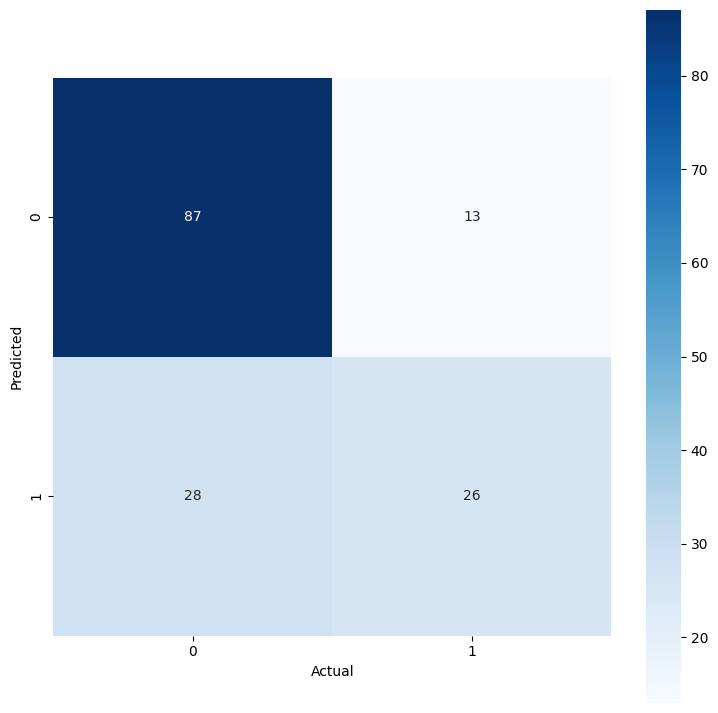

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(cns,annot=True,square=True,cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()